<img width="150" src="http://lettres.sorbonne-universite.fr/sites/default/files/media/2019-10/sorbonne-lettre_1.svg"/>
<h1> Loi de Zipf - Analyse de Corpus </h1>


    

<h3><font color = 'red'>Installation de nltk si ce n'est pas déjà le cas</font></h3>

https://www.nltk.org/install.html

In [1]:
! pip install nltk --user

<h3><font color = 'blue'>Chargement de bibliothèques</font></h3>

In [20]:
#from nltk.corpus import brown#erreur le 12/10/2023 suggère les deux lignes suivantes
#import nltk #suggestion
#nltk.download('brown')#suggestion
from functools import reduce
import matplotlib.pyplot as pyplot
import re
import os
import json

<h3><font color = 'blue'>Définition des fonctions</font></h3>

In [8]:
"""
def load_corpus():
    p = re.compile('\W')
    texte = [token.lower() for token in brown.words()]
    texte = [token for token in texte if not p.match(token)]

    return texte
"""

def load_corpus(folder_path="Corpus"):
    p = re.compile('\W')
    texte = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            filepath = os.path.join(folder_path, filename)
            with open(filepath, encoding='utf-8') as f:
                raw = f.read().lower()
                tokens = raw.split()
                cleaned = [token for token in tokens if not p.match(token)]
                texte.extend(cleaned)

    return texte


def texte_to_dict(texte):
    texte_dict = {}

    for token in texte:
        if token in texte_dict:
            texte_dict[token] += 1
        else:
            texte_dict[token] = 1

    return texte_dict


def dict_to_list(texte_dict):
    texte_list=[]

    for mot in texte_dict.keys():
        texte_list.append([texte_dict[mot], mot])

    texte_list.sort(reverse=True)
    return texte_list


def afficher_n(texte_list, n):

    cumul = 0
    print("rang\tmot\tfrequence\tfrequence(Zipf)")
    print("-"*50)
    for _ in range(n):
        cumul += texte_list[_][0]
        print("{}\t{}\t{}\t\t{:.0f}".format(_+1, texte_list[_][1], texte_list[_][0], texte_list[0][0]/(_+1)))

    total = reduce(lambda x, y: x+y, [_[0] for _ in texte_list])
    prop = cumul/total*100

    print("-"*50)
    print("Ces {} mots représentent le {:0.2f}% du corpus".format(n, prop))


def plot_zipf(texte_list, log=False):
    pyplot.rcParams['figure.figsize'] = [15, 10]

    y = [_[0] for _ in texte_list]

    y_ = []
    for _ in range(len(texte_list)):
        y_.append(int(texte_list[0][0]/(_+1)))

    pyplot.plot(y, "-", label="Réelle")
    pyplot.plot(y_, "--", label="Approximation (Zipf)")

    if log:
        pyplot.yscale("log")
        pyplot.xscale("log")

    pyplot.legend()
    pyplot.title("Loi de Zipf")
    pyplot.xlabel("Rang")
    pyplot.ylabel("Fréquence")
    pyplot.show()


<h3><font color = 'blue'>Analyse du corpus</font></h3>

In [9]:
texte = load_corpus()
print("Quantité des mots (tokens) :", len(texte))
print("Quantité des mots differentes (types) :", len(set(texte)))

Quantité des mots (tokens) : 227410
Quantité des mots differentes (types) : 37092


In [10]:
print(texte[:50])

['rappel', 'de', 'votre', 'demande:', 'format', 'de', 'téléchargement:', 'texte', 'vues', '1', 'à', '136', 'sur', '136', 'nombre', 'de', 'pages:', '136', 'notice', 'complète:', 'titre', 'fleurs', "d'avril", 'poésies', 'jeanne', 'loiseau', 'auteur', 'loiseau,', 'jeanne', 'auteur', 'du', 'texte', 'éditeur', 'date', "d'édition", '1882', 'notice', 'du', 'catalogue', 'http://catalogue.bnf.fr/ark:/12148/cb32347898f', 'type', 'monographie', 'imprimée', 'langue', 'français', 'langue', 'français', 'format', '1', 'vol.']


In [11]:
texte_dict = texte_to_dict(texte)

In [13]:
mots = ["rappel", "de", "votre"]
print("mot\tfrequence")
for mot in mots:
    print("{}\t{}".format(mot, texte_dict[mot]))

mot	frequence
rappel	11
de	7249
votre	265


In [14]:
texte_list = dict_to_list(texte_dict)

In [15]:
afficher_n(texte_list, 15)

rang	mot	frequence	frequence(Zipf)
--------------------------------------------------
1	de	7249		7249
2	et	6780		3624
3	la	6231		2416
4	le	5562		1812
5	les	4474		1450
6	des	3141		1208
7	je	2776		1036
8	que	2655		906
9	à	2478		805
10	qui	2455		725
11	dans	2242		659
12	un	2216		604
13	du	1841		558
14	en	1764		518
15	sur	1468		483
--------------------------------------------------
Ces 15 mots représentent le 23.45% du corpus


## Compléter la cellule suivante pour afficher la courbe Zipf, et commenter les résultats

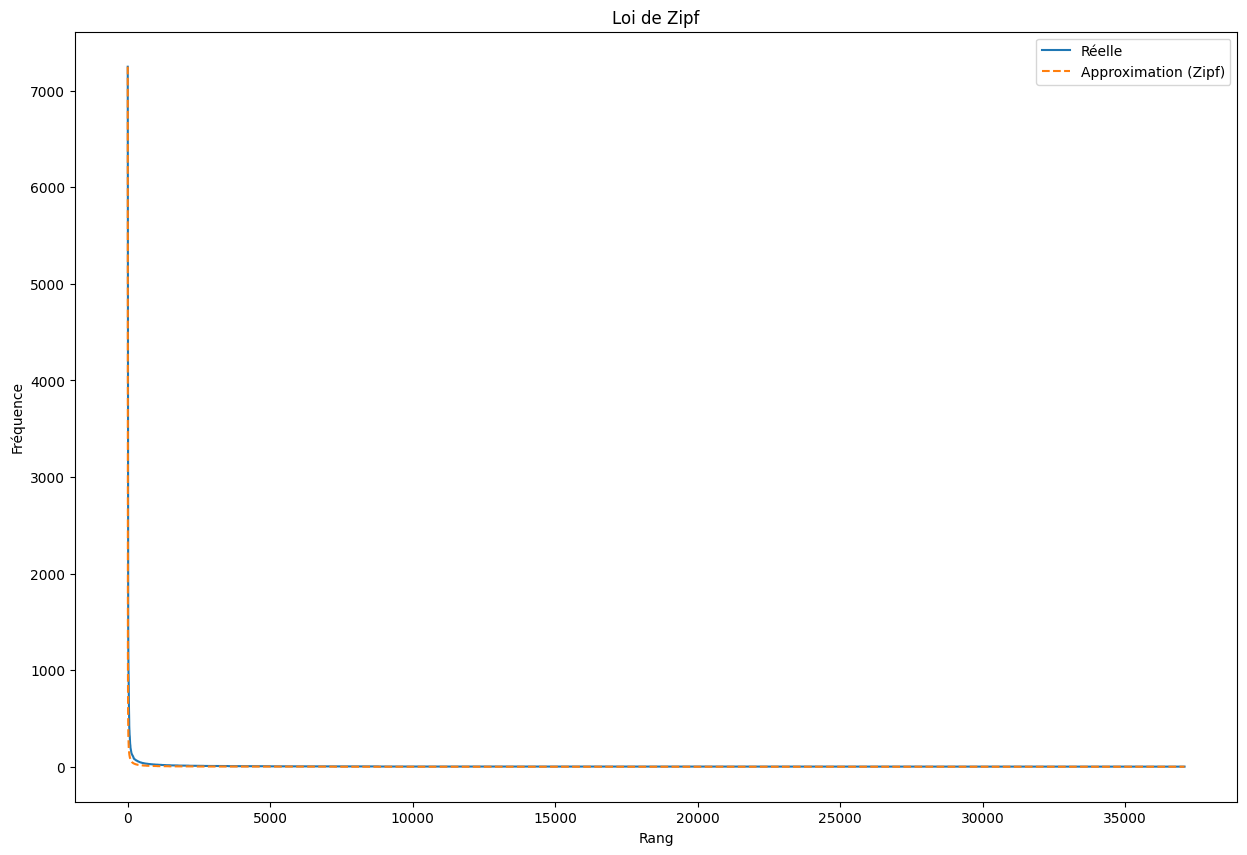

In [16]:
plot_zipf(texte_list[:], log=False)

In [18]:
hapax = [mot for mot, freq in texte_dict.items() if freq == 1]
print(f"Nombre de hapax : {len(hapax)}")
print(f"Proportion : {len(hapax)/len(set(texte)):.2%} des types")
print(hapax)


Nombre de hapax : 23155
Proportion : 62.43% des types
['loiseau,', '1882', 'http://catalogue.bnf.fr/ark:/12148/cb32347898f', 'ark:/12148/bpt6k4227108n', '8-ye-137', '23/02/2020', 'tvi', 'av', 'sÿi', 'ctavril', 'l)', '27-31,', 'tassage', '27-31', 'sols', 'humides,', 'froids;', 'inondées,', 'ondées', 'fronts.', 'ci’', 'd’ombre,', 'grimoire,', 'confidence', 'gardées,', 'm’auraient', 'm’arrache,', 'soupir...', 'que.ceux', 'fend,', 'l’étonnant', 'bleu!', 'message...', 'page,', 'sera-ce', 'fatigue,', 'marguerite,', 'n’attendant,', 'carrière,', 'dessine,', 'd’aubépine,', 'inhabité.', 'paysan,', 'lilas.', 'déliée', 'ctobre', 'l’allée,', 'jaunie', 'foulée', 'distrait.', 'enlaidie,', 'défunts,', 'tiédie', 'dérober', 'd’acres', 'sillon.', 'peuplier,', 'courent,', 'avalanches,', 'échalas.', 'chasseur,', 'l’humidité', 'sanguin,', 's’allonge', 'regain.', 'hirondelles', "j'", 'rs', 'l’écouter.', 'perceptible', 'douter,', 'épaule.', 'bruissement', 'broussailles', 'cigales,', 'lancent', 'inégales,', 'o

In [22]:
# Fonction pour lire les entités extraites à partir d'un fichier JSON
def lire_entites_unifiees(chemin):
    with open(chemin, encoding='utf-8') as f:
        contenu = f.read()

    entites_extraites = []

    try:
        data = json.loads(contenu)

        if "entites" in data:  # Format Camembert / Stanza
            entites_extraites = [e["mot"] for e in data["entites"] if "mot" in e]

        elif isinstance(data, dict):  # Format SpaCy / Flaubert (plusieurs documents)
            for doc_data in data.values():
                entite_liste = (
                    doc_data.get("entités nommées")
                    or doc_data.get("entités")
                    or []
                )
                entites_extraites.extend(
                    [e.get("texte") for e in entite_liste if "texte" in e]
                )

    except json.JSONDecodeError:
        # Cas de fichiers JSON concaténés (format non standard)
        blocs = re.findall(r'\{.*?\}', contenu, re.DOTALL)
        for bloc in blocs:
            try:
                obj = json.loads(bloc)
                if "entites" in obj:
                    entites_extraites.extend([e["mot"] for e in obj["entites"] if "mot" in e])
            except Exception:
                continue

    return set(entites_extraites)

# Calcul de la liste des hapax (mots apparaissant une seule fois)
hapax = {mot for mot, freq in texte_dict.items() if freq == 1}

def calculer_hapax_entites(entites, hapax_set):
    """
    Calcule combien d'entités reconnues sont des hapax.

    entites : liste ou set des entités extraites
    hapax_set : set des hapax (mots uniques)

    Retourne :
      - nombre d'entités hapax
      - nombre total d'entités
      - proportion d'entités hapax
    """
    entites = [e for e in entites if e is not None]  # Filtrer les valeurs None
    total = len(entites)
    hapax_entites = [e for e in entites if e in hapax_set]
    nb_hapax = len(hapax_entites)
    proportion = nb_hapax / total if total > 0 else 0
    return nb_hapax, total, proportion

# Dictionnaire des fichiers JSON contenant les entités extraites par chaque modèle
fichiers = {
    "spaCy_lg": "tous_entites_nommes_Spacy_lg.json",
    "spaCy_sm": "tous_entites_nommes_Spacy_sm.json",
    "Stanza": "tous_entites_nommes_Stanza.json",
    "Camembert": "tous_entites_nommes_Camembert.json",
}

# Calcul et affichage des statistiques pour chaque modèle
for nom, chemin in fichiers.items():
    entites = lire_entites_unifiees(chemin)
    nb_hapax, total, proportion = calculer_hapax_entites(entites, hapax)
    print(f"Modèle {nom} :")
    print(f"  Nombre d'entités : {total}")
    print(f"  Nombre d'entités hapax : {nb_hapax}")
    print(f"  Proportion : {proportion:.2%}\n")



Modèle spaCy_lg :
  Nombre d'entités : 14084
  Nombre d'entités hapax : 92
  Proportion : 0.65%

Modèle spaCy_sm :
  Nombre d'entités : 12417
  Nombre d'entités hapax : 110
  Proportion : 0.89%

Modèle Stanza :
  Nombre d'entités : 7049
  Nombre d'entités hapax : 0
  Proportion : 0.00%

Modèle Camembert :
  Nombre d'entités : 4877
  Nombre d'entités hapax : 57
  Proportion : 1.17%

